In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as st
import numpy as np
import os

# Load data
library_path = "../Data/merged_library_covid_outer.csv"
df = pd.read_csv(library_path)
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373


In [2]:
array = ['Circulation', 'Cases']
circ_vs_cases_2019 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2019)]
circ_vs_cases_2019_df = pd.DataFrame(circ_vs_cases_2019)
circ_vs_cases_2019_df = circ_vs_cases_2019[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2019_df = circ_vs_cases_2019_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2019_df


,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Circulation,2019,381705.0,372365.0,426513.0,401758.0,383028.0,409406.0,458992.0,448513.0,387916.0,416145.0,368193.0,330574.0


In [3]:
array = ['Circulation', 'Cases']
circ_vs_cases_2020 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2020)]
circ_vs_cases_2020_df = pd.DataFrame(circ_vs_cases_2020)
circ_vs_cases_2020_df = circ_vs_cases_2020[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2020_df = circ_vs_cases_2020_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2020_df

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2020,0.0,0.0,6011.0,21750.0,21000.0,5474.0,7656.0,11688.0,8691.0,25946.0,68080.0,33418.0
Circulation,2020,386099.0,359511.0,254970.0,298.0,337.0,172324.0,266128.0,262503.0,267806.0,274224.0,245438.0,236518.0


In [4]:
circ_vs_cases_2020_final_df = pd.merge(circ_vs_cases_2019_df, circ_vs_cases_2020_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
circ_vs_cases_2020_final_df = circ_vs_cases_2020_final_df.transpose()
circ_vs_cases_2020_final_df

TYPE,Circulation,Cases,Circulation
YEAR,2019,2020,2020
JANUARY,381705.0,0.0,386099.0
FEBRUARY,372365.0,0.0,359511.0
MARCH,426513.0,6011.0,254970.0
APRIL,401758.0,21750.0,298.0
MAY,383028.0,21000.0,337.0
JUNE,409406.0,5474.0,172324.0
JULY,458992.0,7656.0,266128.0
AUGUST,448513.0,11688.0,262503.0
SEPTEMBER,387916.0,8691.0,267806.0


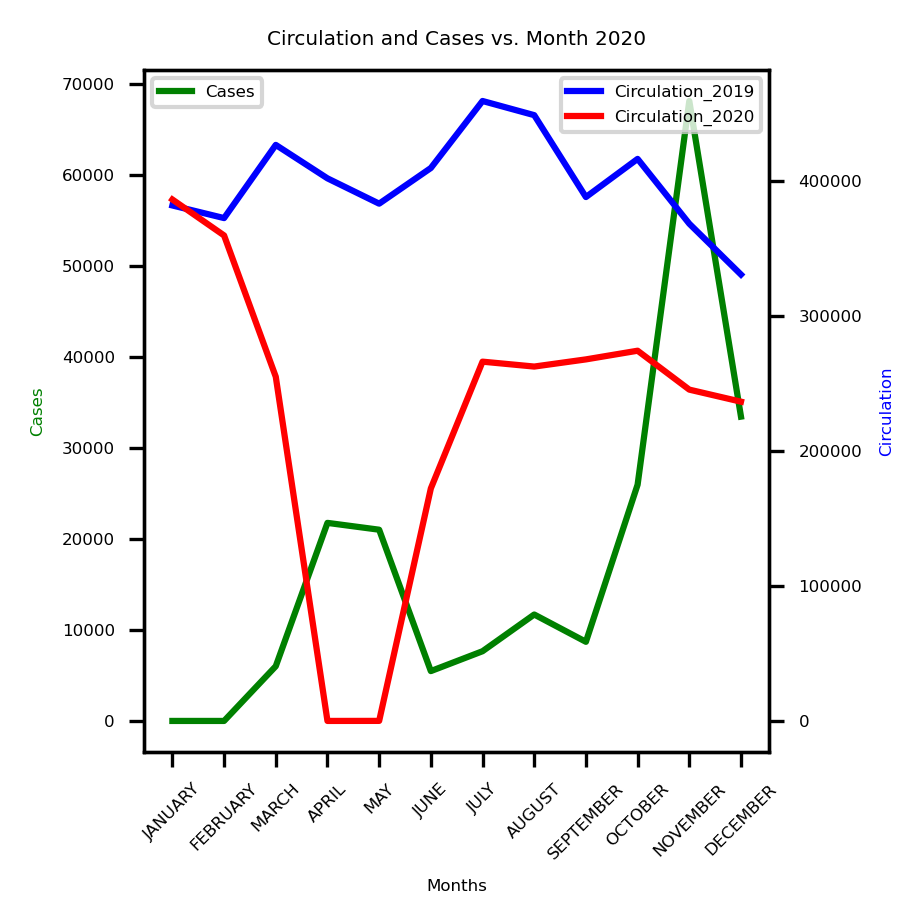

In [16]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(circ_vs_cases_2020_final_df['Cases'], color='g')
ax2.plot(circ_vs_cases_2020_final_df.iloc[:,0], color='b')
ax2.plot(circ_vs_cases_2020_final_df.iloc[:,2], color='r')
plt.title('Circulation and Cases vs. Month 2020')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Circulation', color='b')
fig.tight_layout()
ax2.legend(['Circulation_2019', 'Circulation_2020'])
ax1.legend(['Cases'])

In [6]:
array = ['Circulation', 'Cases']
circ_vs_cases_2021 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2021)]
circ_vs_cases_2021_df = pd.DataFrame(circ_vs_cases_2021)
circ_vs_cases_2021_df = circ_vs_cases_2021[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2021_df = circ_vs_cases_2021_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2021_df = pd.DataFrame(circ_vs_cases_2021_df)
circ_vs_cases_2021_df 



,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2021,28095.0,8159.0,12862.0,16730.0,7959.0,1261.0,4663.0,16667.0,11264.0,11702.0,18593.0,104520.0
Circulation,2021,241924.0,218530.0,271477.0,254755.0,261018.0,284372.0,299508.0,283105.0,274255.0,279494.0,271665.0,244224.0


In [7]:
circ_vs_cases_2021_final_df = pd.merge(circ_vs_cases_2019_df, circ_vs_cases_2021_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
circ_vs_cases_2021_final_df = circ_vs_cases_2021_final_df.transpose()
circ_vs_cases_2021_final_df

TYPE,Circulation,Cases,Circulation
YEAR,2019,2021,2021
JANUARY,381705.0,28095.0,241924.0
FEBRUARY,372365.0,8159.0,218530.0
MARCH,426513.0,12862.0,271477.0
APRIL,401758.0,16730.0,254755.0
MAY,383028.0,7959.0,261018.0
JUNE,409406.0,1261.0,284372.0
JULY,458992.0,4663.0,299508.0
AUGUST,448513.0,16667.0,283105.0
SEPTEMBER,387916.0,11264.0,274255.0


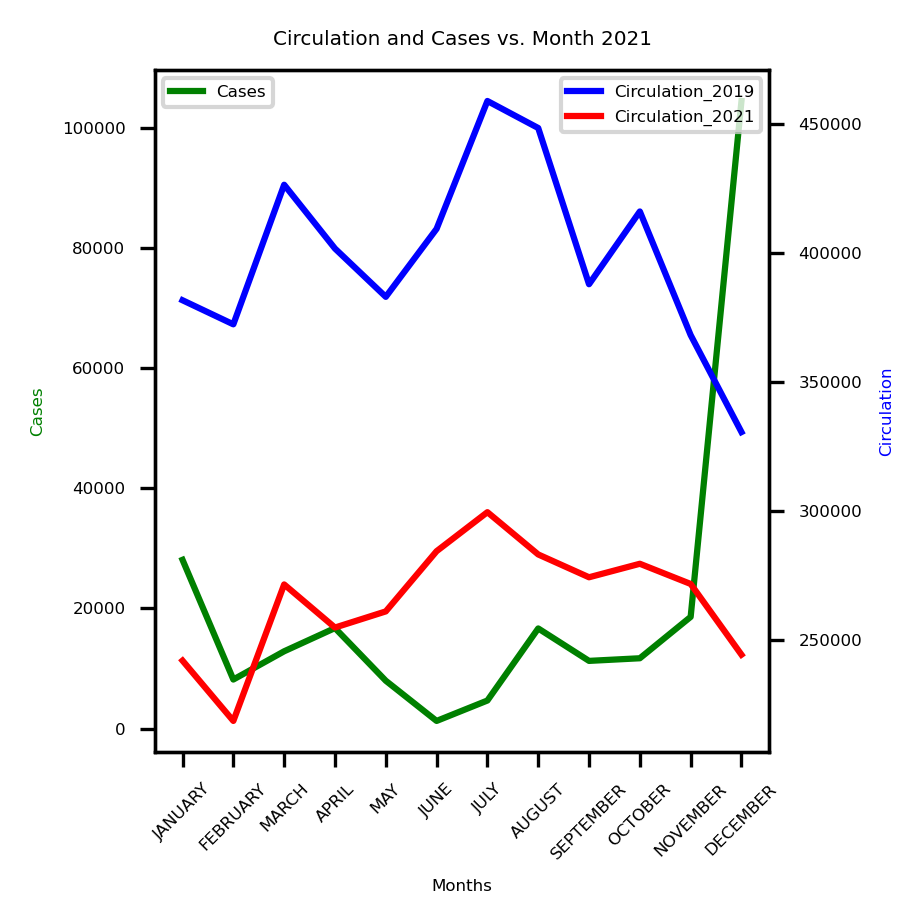

In [8]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(circ_vs_cases_2021_final_df['Cases'], color='g')
ax2.plot(circ_vs_cases_2021_final_df.iloc[:,0], color='b')
ax2.plot(circ_vs_cases_2021_final_df.iloc[:,2], color='r')
plt.title('Circulation and Cases vs. Month 2021')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Circulation', color='b')
fig.tight_layout()
ax2.legend(['Circulation_2019', 'Circulation_2021'])
ax1.legend(['Cases'])

In [9]:
array = ['Visitors', 'Cases']
vis_vs_cases_2019 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2019)]
vis_vs_cases_2019_df = pd.DataFrame(vis_vs_cases_2019)
vis_vs_cases_2019_df = vis_vs_cases_2019_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2019_df = vis_vs_cases_2019_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2019_df = pd.DataFrame(vis_vs_cases_2019_df)
vis_vs_cases_2019_df



,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Visitors,2019,381705.0,372365.0,426513.0,401758.0,383028.0,409406.0,458992.0,448513.0,387916.0,416145.0,368193.0,330574.0


In [10]:
array = ['Visitors', 'Cases']
vis_vs_cases_2020 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2020)]
vis_vs_cases_2020_df = pd.DataFrame(vis_vs_cases_2020)
vis_vs_cases_2020_df = vis_vs_cases_2020_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2020_df = vis_vs_cases_2020_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2020_df = pd.DataFrame(vis_vs_cases_2020_df)
vis_vs_cases_2020_df




,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2020,0.0,0.0,6011.0,21750.0,21000.0,5474.0,7656.0,11688.0,8691.0,25946.0,68080.0,33418.0
Visitors,2020,600846.0,588355.0,416248.0,0.0,0.0,176680.0,259090.0,268506.0,275187.0,286799.0,225861.0,219208.0


In [11]:
vis_vs_cases_2020_final_df = pd.merge(vis_vs_cases_2019_df, vis_vs_cases_2020_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
vis_vs_cases_2020_final_df = vis_vs_cases_2020_final_df.transpose()
vis_vs_cases_2020_final_df

TYPE,Visitors,Cases,Visitors
YEAR,2019,2020,2020
JANUARY,381705.0,0.0,600846.0
FEBRUARY,372365.0,0.0,588355.0
MARCH,426513.0,6011.0,416248.0
APRIL,401758.0,21750.0,0.0
MAY,383028.0,21000.0,0.0
JUNE,409406.0,5474.0,176680.0
JULY,458992.0,7656.0,259090.0
AUGUST,448513.0,11688.0,268506.0
SEPTEMBER,387916.0,8691.0,275187.0


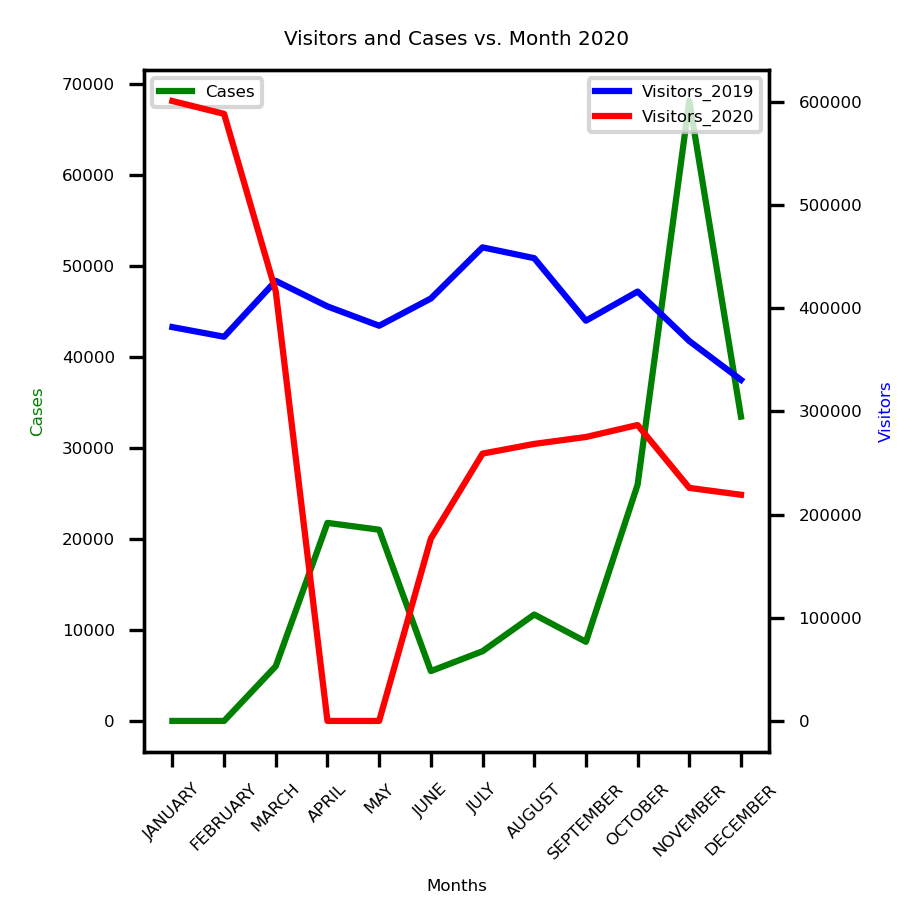

In [12]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(vis_vs_cases_2020_final_df['Cases'], color='g')
ax2.plot(vis_vs_cases_2020_final_df.iloc[:,0], color='b')
ax2.plot(vis_vs_cases_2020_final_df.iloc[:,2], color='r')
plt.title('Visitors and Cases vs. Month 2020')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Visitors', color='b')
fig.tight_layout()
ax2.legend(['Visitors_2019', 'Visitors_2020'])
ax1.legend(['Cases'])

In [13]:
array = ['Visitors', 'Cases']
vis_vs_cases_2021 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2021)]
vis_vs_cases_2021_df = pd.DataFrame(vis_vs_cases_2021)
vis_vs_cases_2021_df = vis_vs_cases_2021_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2021_df = vis_vs_cases_2021_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2021_df = pd.DataFrame(vis_vs_cases_2021_df)
vis_vs_cases_2021_df




,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2021,28095.0,8159.0,12862.0,16730.0,7959.0,1261.0,4663.0,16667.0,11264.0,11702.0,18593.0,104520.0
Visitors,2021,231136.0,215527.0,276087.0,273975.0,260136.0,300678.0,342227.0,329263.0,336216.0,356053.0,334570.0,318884.0


In [14]:
vis_vs_cases_2021_final_df = pd.merge(vis_vs_cases_2019_df, vis_vs_cases_2021_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
vis_vs_cases_2021_final_df = vis_vs_cases_2021_final_df.transpose()
vis_vs_cases_2021_final_df

TYPE,Visitors,Cases,Visitors
YEAR,2019,2021,2021
JANUARY,381705.0,28095.0,231136.0
FEBRUARY,372365.0,8159.0,215527.0
MARCH,426513.0,12862.0,276087.0
APRIL,401758.0,16730.0,273975.0
MAY,383028.0,7959.0,260136.0
JUNE,409406.0,1261.0,300678.0
JULY,458992.0,4663.0,342227.0
AUGUST,448513.0,16667.0,329263.0
SEPTEMBER,387916.0,11264.0,336216.0


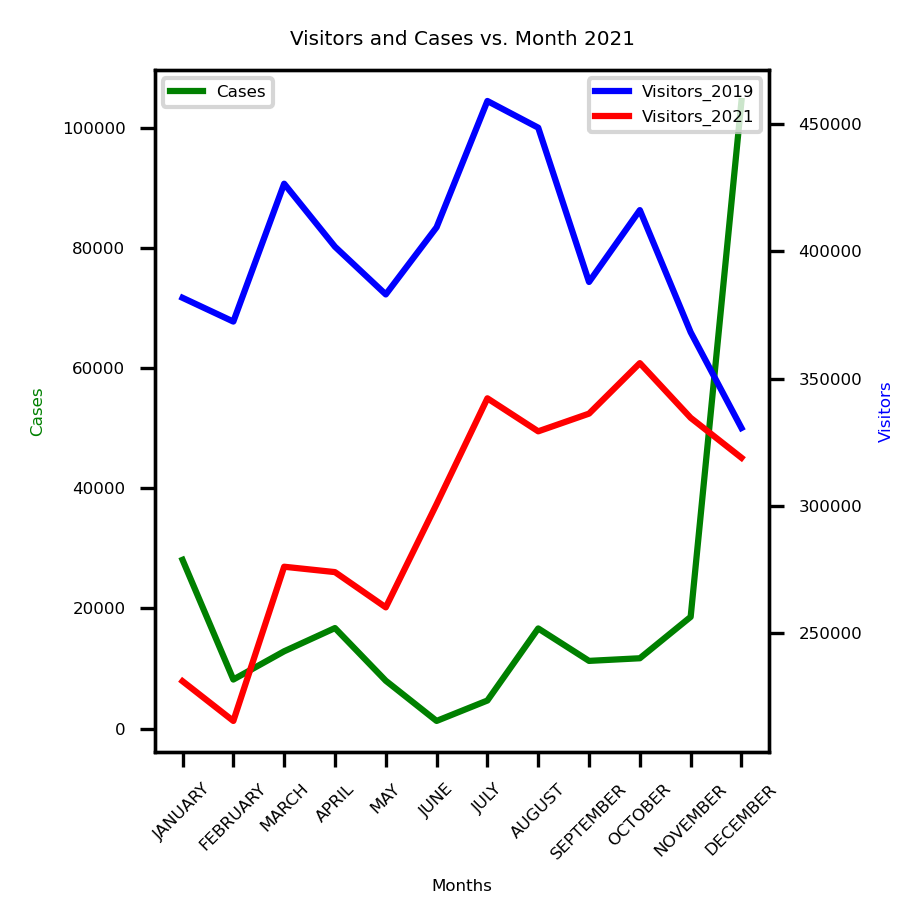

In [15]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(vis_vs_cases_2021_final_df['Cases'], color='g')
ax2.plot(vis_vs_cases_2021_final_df.iloc[:,0], color='b')
ax2.plot(vis_vs_cases_2021_final_df.iloc[:,2], color='r')
plt.title('Visitors and Cases vs. Month 2021')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Visitors', color='b')
fig.tight_layout()
ax2.legend(['Visitors_2019', 'Visitors_2021'])
ax1.legend(['Cases'])